# **Import and Read the dataset**

In [ ]:
#Loading Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Dataset Directory
path='/content/drive/MyDrive/AB_NYC_2019.csv'
df=pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

# **Data Cleaning**

In [ ]:
#showing th columns present in the dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Drop some columns that are not needed for the analysis
df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)

In [ ]:
# Showing dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


# **EXPLORATORY DATA ANALYSIS**

Text(0.5, 1.0, 'Correlation plot')

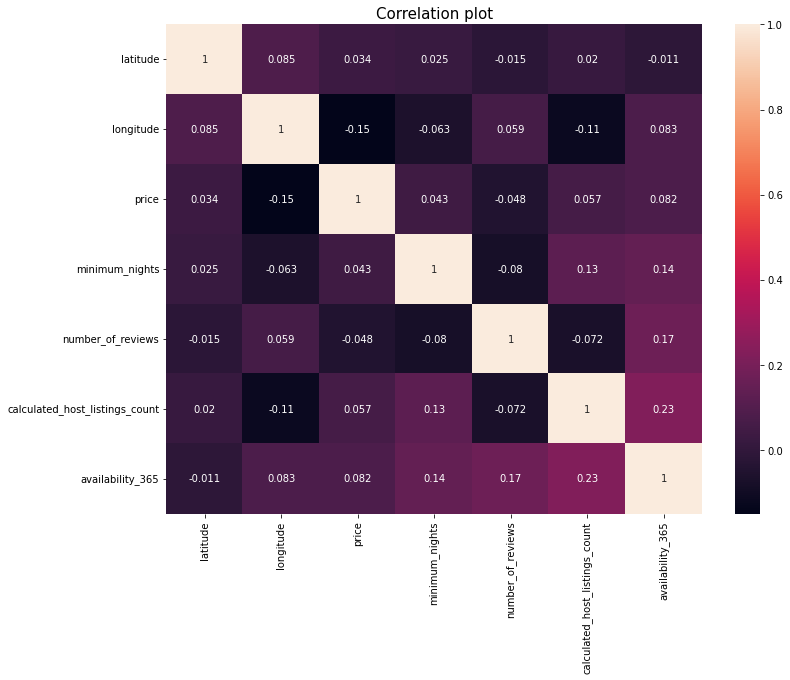

In [ ]:
#feature correlation plot
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation plot', fontsize=15)


Text(0.5, 1.0, 'Price Histogram')

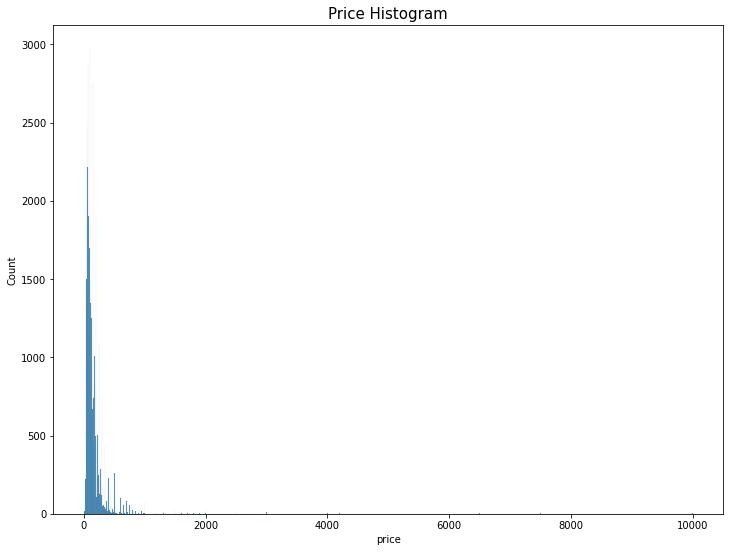

In [ ]:
# Showing price distribution with histogram
plt.figure(figsize=(12, 9))
sns.histplot(data=df, x="price")
plt.title('Price Histogram', fontsize=15)

Text(0.5, 1.0, 'Price distribution with violinplot')

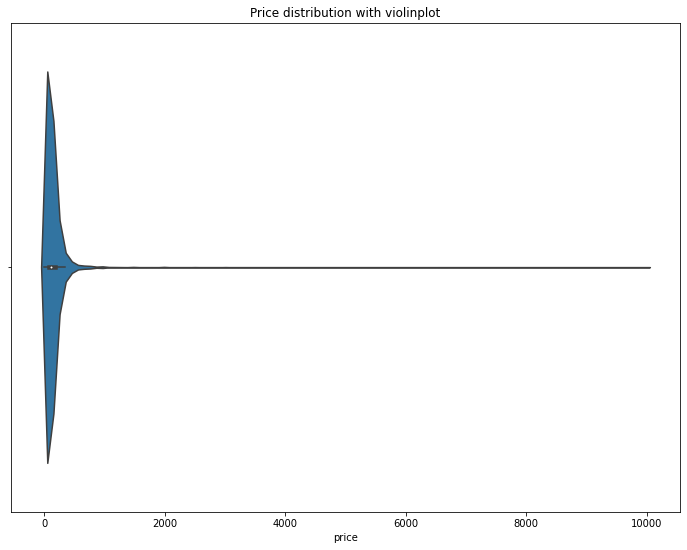

In [ ]:
# Showing price distribution with violinplot
plt.figure(figsize=(12, 9))
sns.violinplot(x=df['price'])
plt.title('Price distribution with violinplot')

In [ ]:
#Binning the price column to 5 categories
price_bin=[]
for i in df['price'].to_list():
  if i >=0 and i <= 100:
    price_bin.append('Low (0-100)')
  elif i >=100 and i <= 200:
    price_bin.append('Medium (100-200)')
  elif i >=200 and i <= 500:
    price_bin.append('High (200-500)')
  elif i >=500:
    price_bin.append('Extremely High (Above 500)')



#create a new column based on binned prices
df['price_bin']=price_bin

**How does Region/Location affect the Rental Price?**

Text(0, 0.5, 'Longitude')

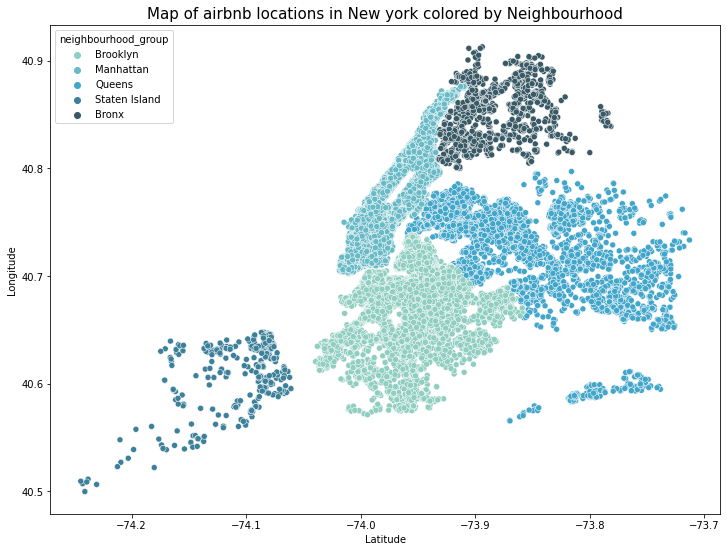

In [ ]:
#plot of Map of airbnb locations in New york colored by neighbourhood
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb locations in New york colored by Neighbourhood', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")

Text(0, 0.5, 'Longitude')

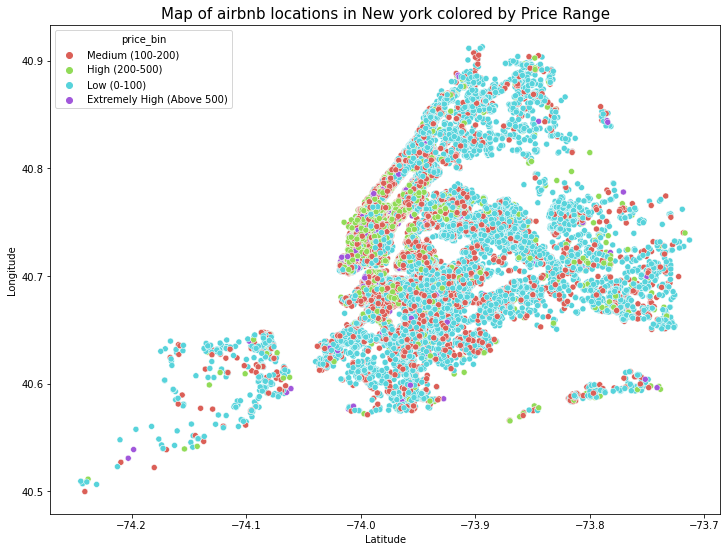

In [ ]:
#plot of map of airbnb locations in New york colored by price ranges
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price_bin', palette="hls")
plt.title('Map of airbnb locations in New york colored by Price Range', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")



Text(0, 0.5, 'Average Price')

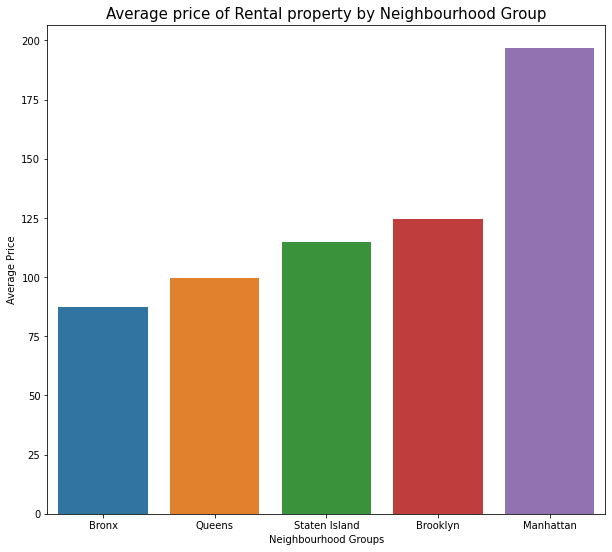

In [ ]:
#Average price of Rental property by Neighbourhood Group
avg_price_per_neighbourhood_groups=df.groupby('neighbourhood_group')['price'].mean().to_frame().sort_values('price').reset_index()

# BarPlot of Average price of Rental property by Neighbourhood Group
plt.figure(figsize=(10, 9))
sns.barplot(data=avg_price_per_neighbourhood_groups, x='neighbourhood_group'	, y='price')
plt.title('Average price of Rental property by Neighbourhood Group', fontsize=15)
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price')

Text(0, 0.5, 'Price')

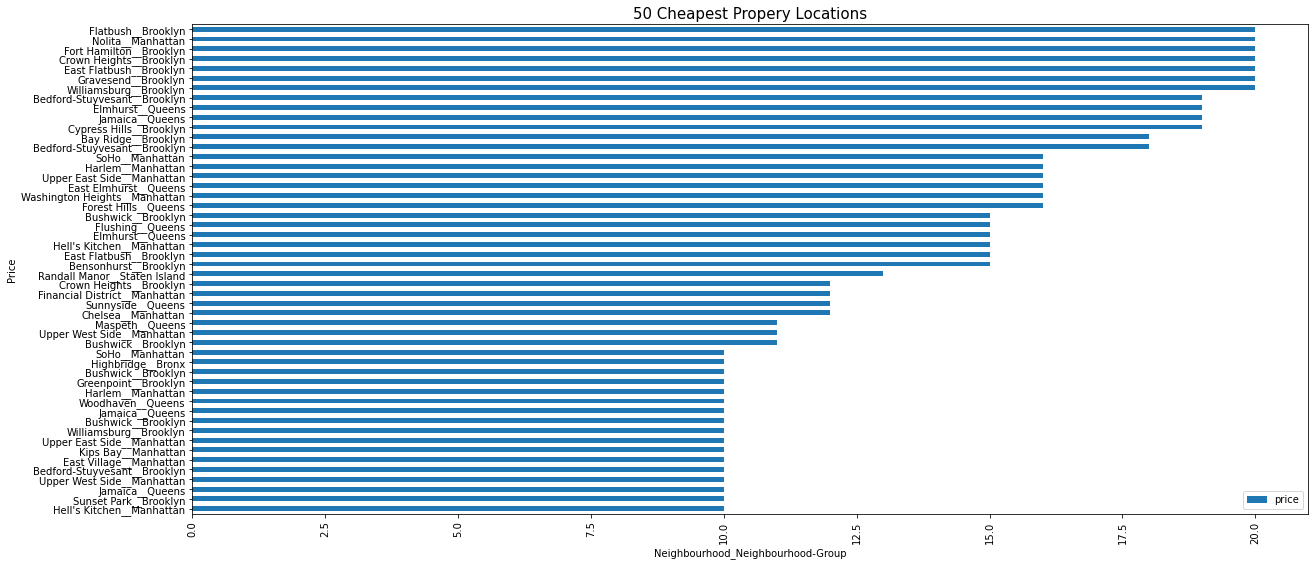

In [ ]:
#Location of Top 50 Cheapest Neighbourhoods and Corresponding Price
df['neighbourhood_name_group']=df['neighbourhood'] +"__"+ (df['neighbourhood_group'])
neighbourhood_name_group=df[ df['price']!= 0]
neighbourhood_name_group=neighbourhood_name_group[['neighbourhood_name_group', 'price']].sort_values('price').head(50)

#bar plot of location of Top 50 Cheapest Neighbourhoods and Corresponding Price
neighbourhood_name_group.plot(kind='barh', x='neighbourhood_name_group'	, y='price', figsize=(20, 9))
plt.title('50 Cheapest Propery Locations', fontsize=15)
plt.xlabel('Neighbourhood_Neighbourhood-Group')
plt.xticks(rotation=90)
plt.ylabel('Price')

Text(0, 0.5, 'Price')

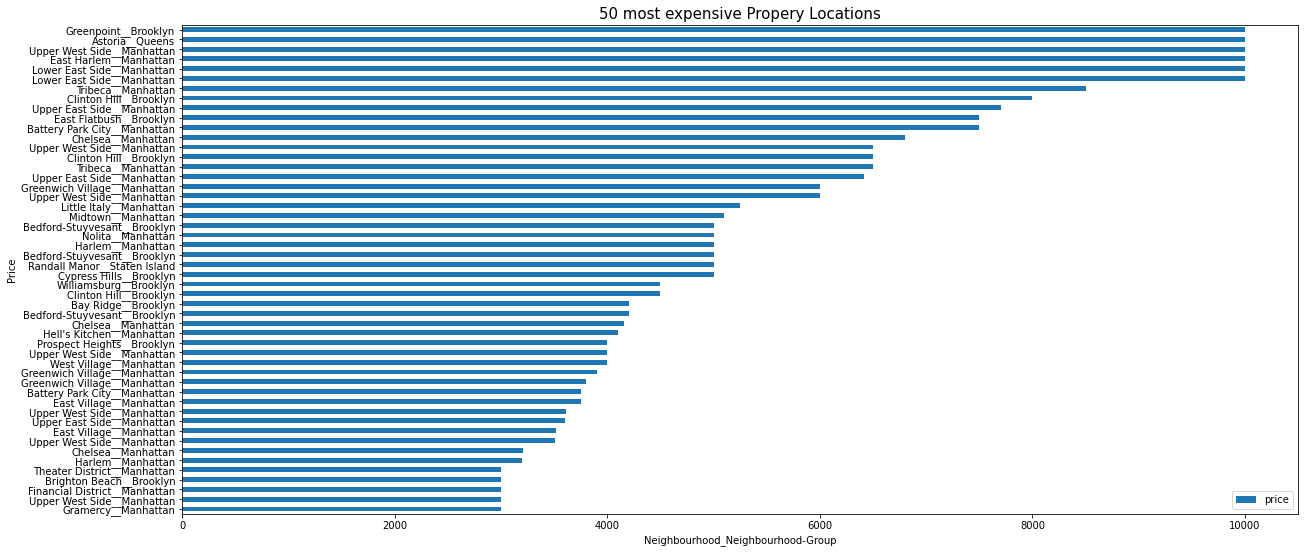

In [ ]:
#Location of Top 50 Expensive Neighbourhoods and Corresponding Price
df['neighbourhood_name_group']=df['neighbourhood'] +"__"+ (df['neighbourhood_group'])
neighbourhood_name_group=df[ df['price']!= 0]
neighbourhood_name_group=neighbourhood_name_group[['neighbourhood_name_group', 'price']].sort_values('price').tail(50)

#bar plot of location of Top 50 Expensive Neighbourhoods and Corresponding Price
neighbourhood_name_group.plot(kind='barh', x='neighbourhood_name_group'	, y='price', figsize=(20, 9))
plt.title('50 most expensive Propery Locations', fontsize=15)
plt.xlabel('Neighbourhood_Neighbourhood-Group')
plt.ylabel('Price')

**What impact does reviews play in determing Rental price?**

Text(0.5, 1.0, 'Scatter plot of number of reviews against price hued by Price ranges')

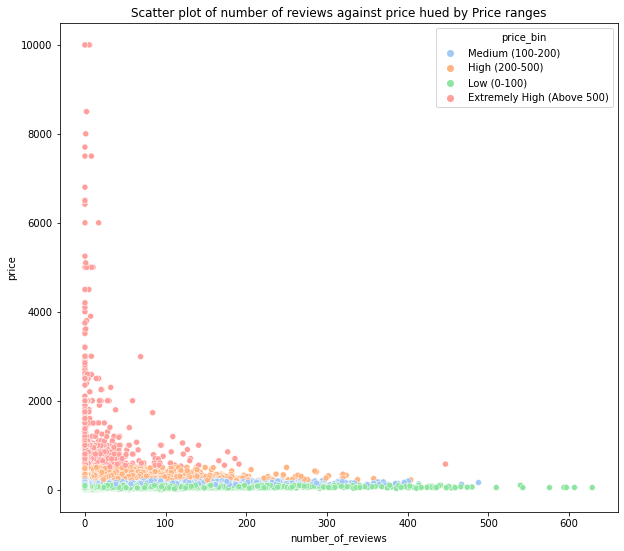

In [ ]:
#Scatter plot of number of reviews against price hued by Price ranges
plt.figure(figsize=(10, 9))
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='price_bin', palette='pastel')
plt.title('Scatter plot of number of reviews against price hued by Price ranges')


**How does number of Host listings affects Rental prices?**

Text(0.5, 1.0, 'Plot of host listings distribution by price ranges')

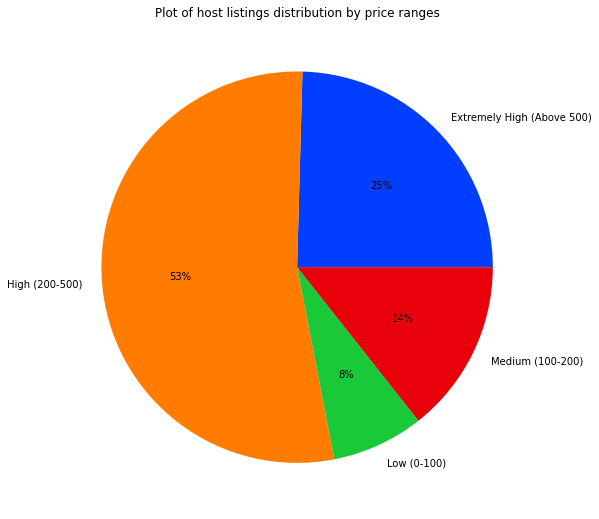

In [ ]:
#Average host listings by price ranges
avg_hostlistings_price=df.groupby('price_bin')['calculated_host_listings_count'].mean().to_frame().reset_index()

#Pie plot of average host listings by price ranges
palette_color = sns.color_palette('bright')
plt.figure(figsize=(10, 9))
plt.pie(avg_hostlistings_price['calculated_host_listings_count'].to_list(), labels=avg_hostlistings_price['price_bin'].to_list(), autopct='%.0f%%', colors=palette_color)
plt.title('Plot of host listings distribution by price ranges')

**How does Room Type affects Price?**

Text(0.5, 1.0, 'Distribution of room types by price')

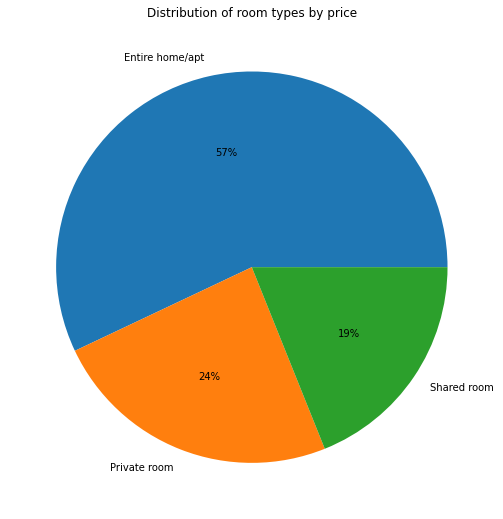

In [ ]:
#Room type distribution by Price
avgprice_per_roomtype=df.groupby('room_type')['price'].mean().to_frame().reset_index()
avgprice_per_roomtype['price']=avgprice_per_roomtype['price'].astype('int')

#Pie plot of average room type distribution by Price
plt.figure(figsize=(10, 9))
plt.pie(avgprice_per_roomtype['price'].to_list(), labels=avgprice_per_roomtype['room_type'].to_list(), autopct='%.0f%%')
plt.title('Distribution of room types by price')

Text(0.5, 1.0, 'Scatter plots of minimum nights available against price hued by Price ranges')

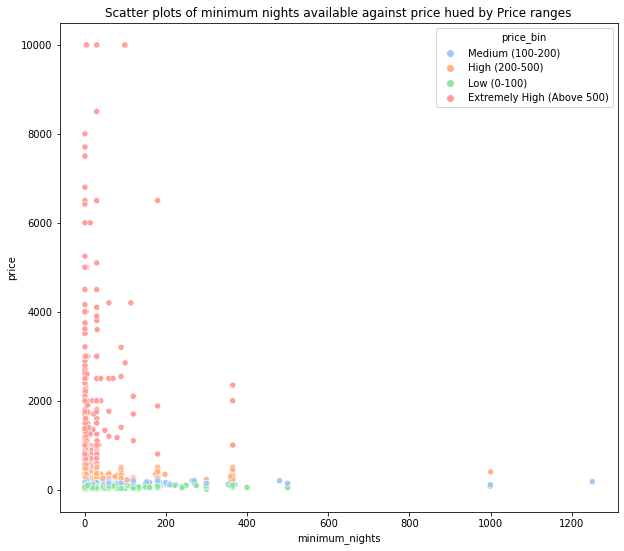

In [ ]:
#Scatter plots of minimum nights available against price hued by Price ranges
plt.figure(figsize=(10, 9))
sns.scatterplot(data=df, x='minimum_nights', y='price', hue='price_bin', palette='pastel')
plt.title('Scatter plots of minimum nights available against price hued by Price ranges')

# **Supervised Learning**

**Label encoding**

In [ ]:
le=LabelEncoder()
for i in ['neighbourhood_group', 'neighbourhood', 'room_type','price_bin', 'neighbourhood_name_group']:
  df[i]=le.fit_transform(df[i])

**Train and Test Split**

In [ ]:
X=df.drop(['price','price_bin', 'neighbourhood_name_group'], axis=1)
Y=df['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

**Feature Scaling**

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train_scaled, y_train)
y_pred=reg.predict(x_test_scaled)

**Evaluation Metrics**

In [ ]:
r2=reg.score(x_test_scaled, y_test)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred, squared=False)
rmse=mean_squared_error(y_test, y_pred)

print('R-Squared :',  r2)
print('mean absolute error :', mae)
print('mean squared error :',  mse)
print('root mean squared error:', rmse)

R-Squared : 0.12052053574681909
mean absolute error : 72.96581811443788
mean squared error : 188.46699379957977
root mean squared error: 35519.80775185084


**Coefficient of determination**

In [ ]:
coef=pd.DataFrame(reg.coef_)

columns=X.columns.to_list()
Features=pd.DataFrame(columns, columns=['Features'])

pd.concat([Features, coef], axis=1).rename(columns={0: 'Coeficient'})

,Features,Coeficient
0,neighbourhood_group,8.435135
1,neighbourhood,6.720329
2,latitude,7.404364
3,longitude,-28.773192
4,room_type,-55.030177
5,minimum_nights,0.783458
6,number_of_reviews,-14.588940
7,calculated_host_listings_count,-3.073146
8,availability_365,26.413195


# **Unsupervised Analysis**

In [ ]:
#dataset feature scaling
scaled_df=scaler.fit_transform(df)

In [ ]:
#calculating SSE
sse = []
k_rng = range(1,30)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    sse.append(km.inertia_)


Text(0, 0.5, 'Sum of squared error')

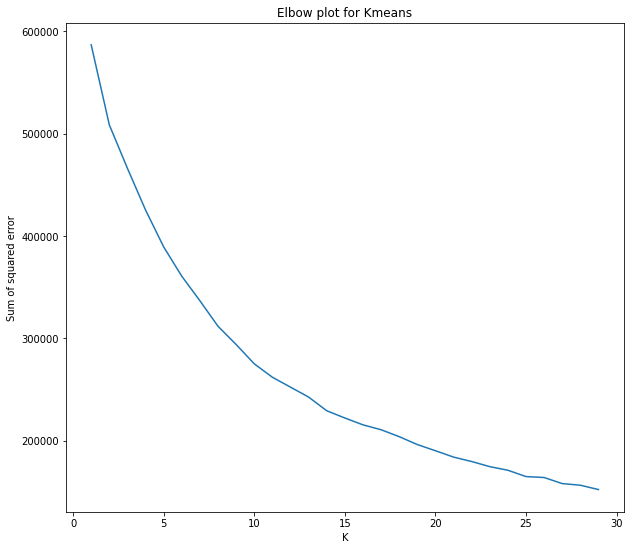

In [ ]:
#plot of SSE
plt.figure(figsize=(10, 9))
plt.plot(k_rng,sse)
plt.title('Elbow plot for Kmeans')
plt.xlabel('K')
plt.ylabel('Sum of squared error')

In [ ]:
km = KMeans(n_clusters=20)
km.fit(scaled_df)

KMeans(n_clusters=20)